In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30

In [109]:
HTS = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv", encoding = "cp949")
players = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv", encoding ="cp949")
batter_base = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv", encoding = "cp949")
team = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv", encoding = "cp949")
score = pd.read_csv("01_제공데이터/21년득점타점.csv")

In [110]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     198 non-null    object
 1   득점      198 non-null    int64 
 2   타점      198 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [111]:
predict_name_list = ["양의지", "강백호", "최정", "이정후", "채은성", "김재환", "전준우", "김현수", "박건우", "로맥"]

In [112]:
print(HTS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GYEAR        17964 non-null  int64  
 1   G_ID         17964 non-null  object 
 2   PIT_ID       17964 non-null  object 
 3   PCODE        17964 non-null  int64  
 4   T_ID         17964 non-null  object 
 5   INN          17964 non-null  int64  
 6   HIT_VEL      17964 non-null  float64
 7   HIT_ANG_VER  17964 non-null  float64
 8   HIT_RESULT   17964 non-null  object 
 9   PIT_VEL      17964 non-null  float64
 10  STADIUM      17964 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.5+ MB
None


In [113]:
len(HTS["PIT_ID"].unique())

17830

In [114]:
HTS.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,17964.0,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2021.0,67633.956468,4.975006,134.391496,17.573859,135.868189
std,0.0,8406.789409,2.573506,19.476600,23.833166,9.126255
min,2021.0,50054.000000,1.000000,27.460000,-56.500000,97.220000
25%,2021.0,62925.000000,3.000000,122.940000,-1.400000,129.420000
50%,2021.0,66965.000000,5.000000,137.835000,14.400000,137.600000
75%,2021.0,75847.000000,7.000000,149.030000,32.100000,142.980000
max,2021.0,79608.000000,12.000000,176.820000,89.500000,155.840000


In [115]:
print(players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GYEAR     647 non-null    int64 
 1   PCODE     647 non-null    int64 
 2   NAME      647 non-null    object
 3   T_ID      647 non-null    object
 4   POSITION  647 non-null    object
 5   AGE_VA    647 non-null    int64 
 6   MONEY     643 non-null    object
dtypes: int64(3), object(4)
memory usage: 35.5+ KB
None


In [116]:
print(batter_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GYEAR    246 non-null    int64  
 1   PCODE    246 non-null    int64  
 2   GAMENUM  246 non-null    int64  
 3   PA       246 non-null    int64  
 4   AB       246 non-null    int64  
 5   BA       246 non-null    float64
 6   HIT      246 non-null    int64  
 7   HR       246 non-null    int64  
 8   TOTB     246 non-null    int64  
 9   SLG      246 non-null    float64
 10  SF       246 non-null    int64  
 11  BB       246 non-null    int64  
 12  KK       246 non-null    int64  
 13  IB       246 non-null    int64  
 14  HP       246 non-null    int64  
 15  GD       246 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 30.9 KB
None


In [117]:
print(len(list(players["PCODE"])))
print(len(list(HTS["PCODE"])))
print(len(list(batter_base["PCODE"])))
print("\n")

print(len(set(list(players["PCODE"]))))
print(len(set(list(HTS["PCODE"]))))
print(len(set(list(batter_base["PCODE"]))))
print("\n")


print(len(set(list(HTS["PCODE"])).intersection(set(list(players["PCODE"])))))
print(len(set(list(HTS["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print(len(set(list(players["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print("\n")

647
17964
246


647
239
246


239
239
246




In [118]:
PCODE = list(players["PCODE"])
NAME = list(players["NAME"])
AGE = list(players["AGE_VA"])

len(list(zip(PCODE, NAME)))

647

In [119]:
players_name_number = dict(list(zip(PCODE, NAME)))
players_age_number = dict(list(zip(PCODE, AGE)))

In [120]:
HTS["NAME"] = HTS["PCODE"].map(players_name_number)
batter_base["NAME"] = batter_base["PCODE"].map(players_name_number)


HTS["AGE_VA"] = HTS["PCODE"].map(players_age_number)
batter_base["AGE_VA"] = batter_base["PCODE"].map(players_age_number)

In [121]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2021,20210403SSWO0,210403_140101,62415,SS,1,131.70,-5.8,땅볼아웃,144.35,고척,박해민,31
1,2021,20210403SSWO0,210403_140857,74163,WO,1,116.87,18.4,1루타,132.34,고척,이용규,35
2,2021,20210403SSWO0,210403_141459,75125,WO,1,160.00,16.8,2루타,120.78,고척,박병호,35


In [122]:
players.head(3)

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2021,50030,소형준,KT,투,19,14000만원
1,2021,50036,이강준,KT,투,19,3000만원
2,2021,50040,데스파이네,KT,투,34,500000달러


In [123]:
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA
0,2021,50054,25,28,25,0.200,5,0,5,0.200,0,1,5,0,2,0,천성호,23
1,2021,50150,7,12,10,0.100,1,0,1,0.100,0,1,2,0,1,0,손호영,26
2,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,라모스,26


In [124]:
team_dict = {
    "HH" : "한화",
    "HT" : "KIA",
    "KT" : "KT",
    "LG" : "LG",
    "LT" : "롯데",
    "NC" : "NC",
    "OB" : "두산",
    "SK" : "SSG",
    "SS" : "삼성",
    "WO" : "키움"
}

In [125]:
team_dict

{'HH': '한화',
 'HT': 'KIA',
 'KT': 'KT',
 'LG': 'LG',
 'LT': '롯데',
 'NC': 'NC',
 'OB': '두산',
 'SK': 'SSG',
 'SS': '삼성',
 'WO': '키움'}

In [126]:
HTS["T_ID"] = HTS["T_ID"].map(team_dict)
players["T_ID"] = players["T_ID"].map(team_dict)

In [127]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2021,20210403SSWO0,210403_140101,62415,삼성,1,131.70,-5.8,땅볼아웃,144.35,고척,박해민,31
1,2021,20210403SSWO0,210403_140857,74163,키움,1,116.87,18.4,1루타,132.34,고척,이용규,35
2,2021,20210403SSWO0,210403_141459,75125,키움,1,160.00,16.8,2루타,120.78,고척,박병호,35


C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


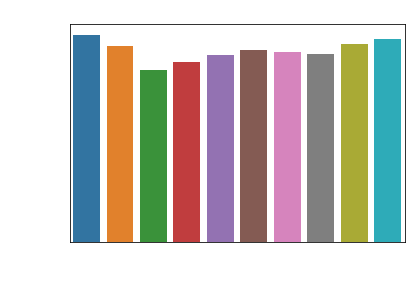

In [128]:
sns.countplot(HTS.T_ID)
plt.xticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.yticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.xlabel("팀이름", color = "w", fontsize = 15)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("팀별경기수", color = "w", fontsize = 15)

plt.show()

In [71]:
HTS.HIT_VEL.describe()

count    17964.000000
mean       134.391496
std         19.476600
min         27.460000
25%        122.940000
50%        137.835000
75%        149.030000
max        176.820000
Name: HIT_VEL, dtype: float64

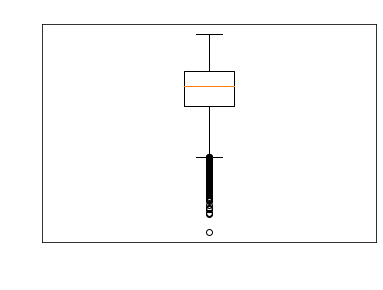

In [23]:
plt.boxplot(HTS.HIT_VEL)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("타구속도", color = "w", fontsize = 15)
plt.show()

In [24]:
HTS.HIT_VEL.describe()

count    17964.000000
mean       134.391496
std         19.476600
min         27.460000
25%        122.940000
50%        137.835000
75%        149.030000
max        176.820000
Name: HIT_VEL, dtype: float64

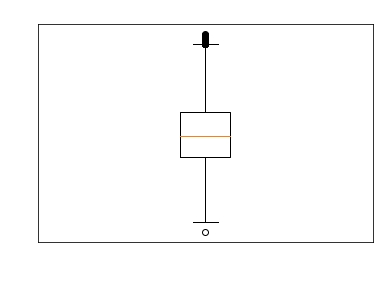

In [25]:
plt.boxplot(HTS.HIT_ANG_VER)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("발사각도", color = "w", fontsize = 15)
plt.show()

In [26]:
HTS.HIT_ANG_VER.describe()

count    17964.000000
mean        17.573859
std         23.833166
min        -56.500000
25%         -1.400000
50%         14.400000
75%         32.100000
max         89.500000
Name: HIT_ANG_VER, dtype: float64

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


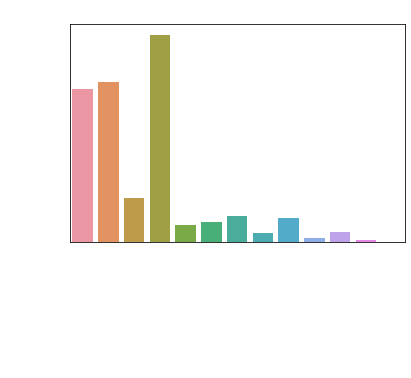

In [27]:
sns.countplot(HTS.HIT_RESULT)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("타격결과", color = "w", fontsize = 15)
plt.show()

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


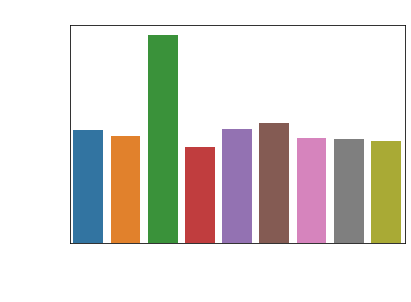

In [28]:
sns.countplot(HTS.STADIUM)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("구장별경기수", color = "w", fontsize = 15)
plt.show()

Text(0.5, 1.0, '타구속도 별 발사각도')

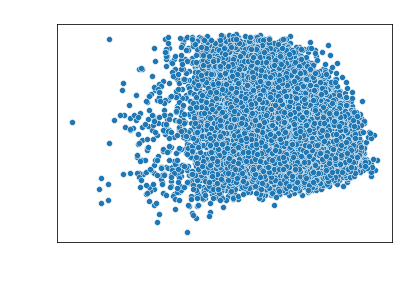

In [29]:
sns.scatterplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 발사각도')

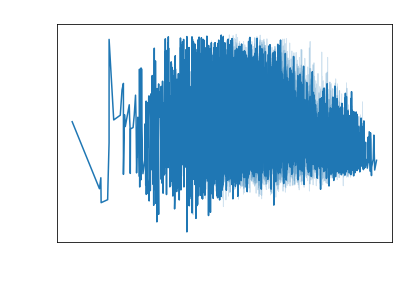

In [30]:
sns.lineplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

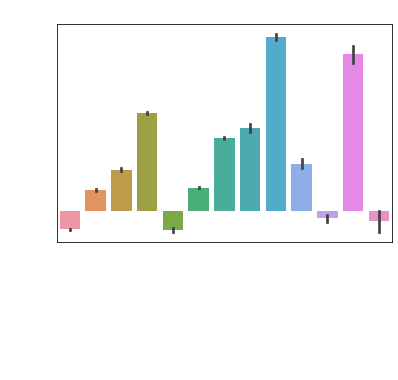

In [31]:
sns.barplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

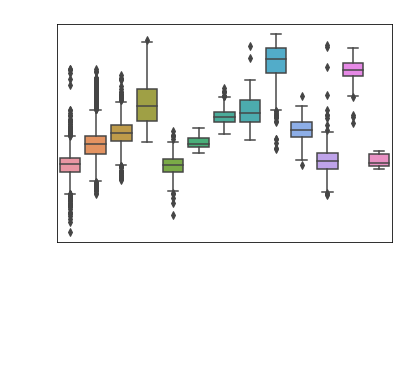

In [32]:
sns.boxplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

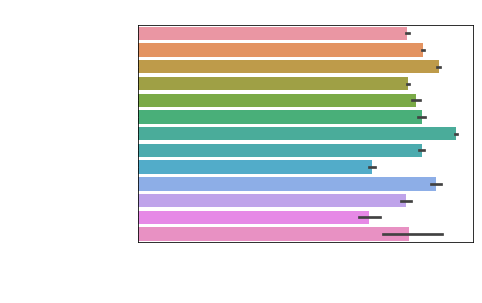

In [33]:
sns.barplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

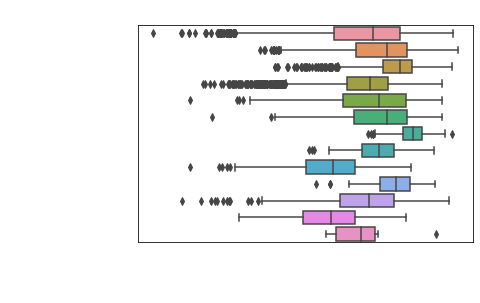

In [34]:
sns.boxplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

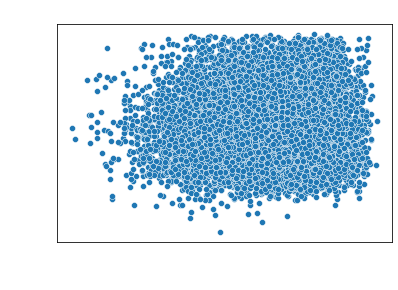

In [35]:
sns.scatterplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

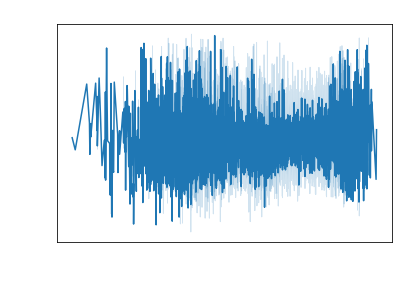

In [36]:
sns.lineplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

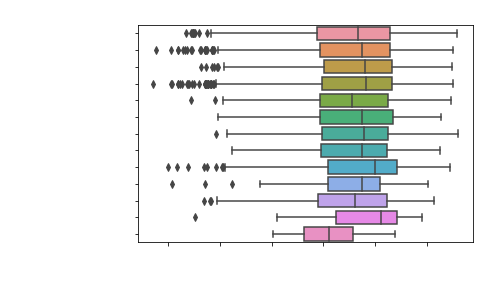

In [34]:
sns.boxplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

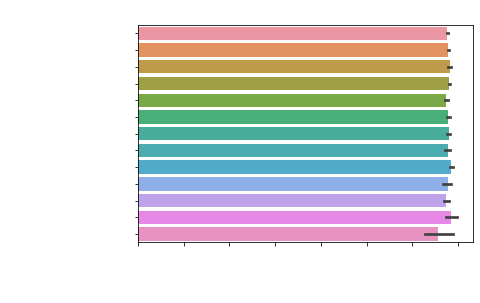

In [35]:
sns.barplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 타구속도')

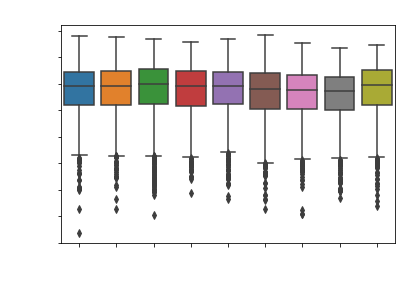

In [36]:
sns.boxplot( x = "STADIUM", y = "HIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 타구속도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 발사각도')

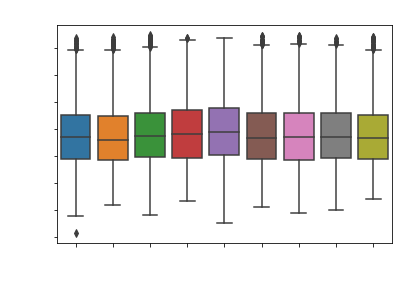

In [37]:
sns.boxplot( x = "STADIUM", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("구장 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 상대투수투구구속')

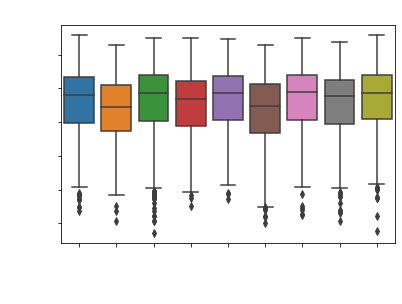

In [38]:
sns.boxplot( x = "STADIUM", y = "PIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("PIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 상대투수투구구속", color = "w", fontsize = 15)


In [39]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_ANG_VER")

In [40]:
pivot

HIT_RESULT,1루타,2루타,3루타,내야안타(1루타),땅볼아웃,병살타,야수선택,인필드플라이,직선타,파울플라이,플라이,홈런,희생플라이
STADIUM,,,,,,,,,,,,,
고척,8.008125,18.372727,19.144444,0.986957,-7.332414,-9.907895,-3.45,64.050000,9.365385,67.782692,37.744655,29.071739,31.520690
광주,8.088967,17.582143,16.462500,-5.203846,-6.979853,-9.205882,-5.40,68.250000,9.288000,68.096667,37.905647,28.968750,38.275000
대구,7.985861,14.169421,19.013333,4.588462,-7.211392,-7.079167,-8.90,65.541667,9.988000,71.295402,39.051246,27.555556,29.846429
대전,9.178977,15.389683,25.136364,-5.017143,-6.466432,-8.758140,NaN,61.085714,9.436923,61.064706,39.139695,29.217460,33.659091
문학,8.024939,16.736111,19.760000,-3.855556,-6.978987,-7.852941,-5.40,43.775000,9.223636,69.690816,39.730030,28.851456,33.365217
사직,7.925061,13.964138,16.142857,-3.060000,-6.690541,-5.938095,NaN,59.633333,8.778846,70.539623,38.612170,28.801370,30.469565
수원,7.798276,18.838889,23.575000,-5.355556,-7.212946,-6.160000,NaN,57.933333,10.689796,70.897872,38.469819,30.148333,31.737037
잠실,9.006856,15.411399,17.200000,-2.313793,-6.841304,-6.618519,3.00,63.537500,8.241053,68.143333,37.866143,27.812632,32.168627
창원,7.890439,16.908824,10.600000,-6.505556,-7.716511,-5.656757,NaN,65.233333,9.928986,68.153448,39.514718,28.992553,35.963158


Text(0.5, 1.0, '구장 별 타격결과 발사각도')

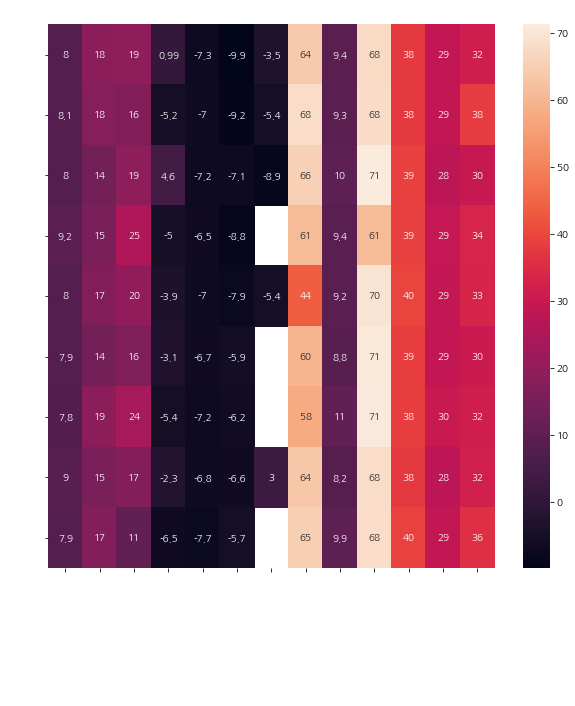

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 발사각도", color = "w", fontsize = 15)

In [42]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_VEL")

Text(0.5, 1.0, '구장 별 타격결과 타구속도')

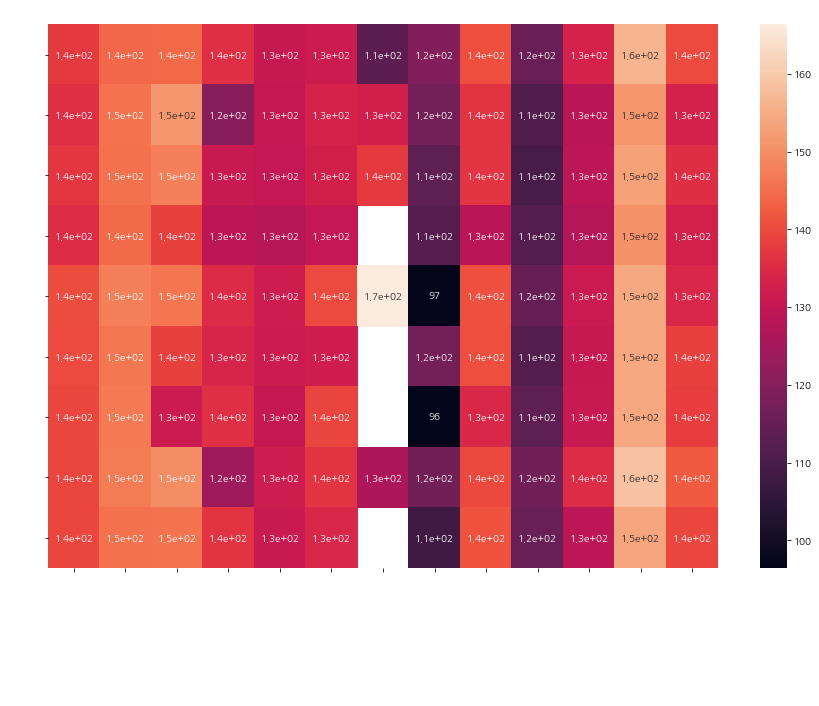

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 타구속도", color = "w", fontsize = 15)

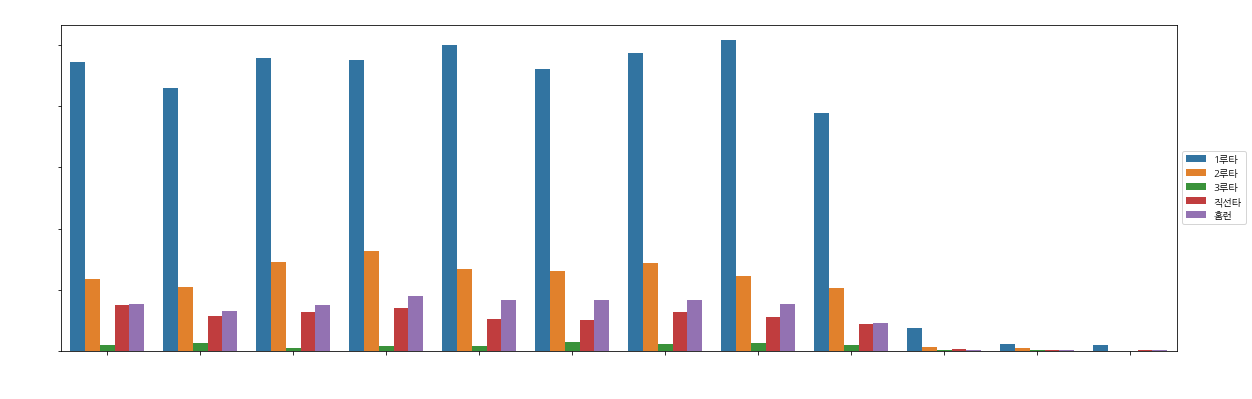

In [46]:
a = pd.DataFrame(HTS.groupby(["INN","HIT_RESULT"])["HIT_RESULT"].count())
a = a.rename(columns = {"HIT_RESULT" : "count"}).reset_index()
b = a[(a["HIT_RESULT"] == "1루타") | (a["HIT_RESULT"] == "2루타") | (a["HIT_RESULT"] == "3루타") | (a["HIT_RESULT"] == "홈런") | (a["HIT_RESULT"] == "직선타")]

plt.figure(figsize = (20,6))
sns.barplot(x = "INN", y = "count", data = b, hue = "HIT_RESULT")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("INN", fontsize = 15, color = "w")
plt.ylabel("COUNT", fontsize = 15, color = "w")
plt.title("21년 이닝별결과", color = "w", fontsize = 15)
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5))


In [47]:
b.groupby(["HIT_RESULT"])["count"].sum()

HIT_RESULT
1루타    4259
2루타    1176
3루타      92
직선타     537
홈런      681
Name: count, dtype: int64

In [129]:
HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()
HIT_VEL_ANG_mean.loc[["홈런","1루타","2루타","3루타","직선타"]]

<ipython-input-129-2157134e4bc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()


,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
홈런,154.347342,28.703524
1루타,138.409850,8.268936
2루타,146.035825,16.288435
3루타,144.787717,18.681522
직선타,137.758156,9.347858


In [130]:
HIT_VEL_ANG_mean.loc[:]

,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
1루타,138.409850,8.268936
2루타,146.035825,16.288435
3루타,144.787717,18.681522
내야안타(1루타),130.271365,-2.791882
땅볼아웃,130.745461,-7.021636
병살타,134.796417,-7.405215
야수선택,131.525000,-3.933333
인필드플라이,112.355098,61.843137
직선타,137.758156,9.347858


In [131]:
# 출루율 공식 (안타+사사구)÷(타수+사사구+희생플라이)

# batter_base 새로운 컬럼 추가(출루율)

batter_base["OBP"] = (batter_base["HIT"] + batter_base["BB"] + batter_base["HP"]) / (batter_base["AB"] + batter_base["BB"] + batter_base["HP"] + batter_base["SF"])
batter_base["OPS"] = batter_base["OBP"] + batter_base["SLG"]
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
0,2021,50054,25,28,25,0.200,5,0,5,0.200,0,1,5,0,2,0,천성호,23,0.285714,0.485714
1,2021,50150,7,12,10,0.100,1,0,1,0.100,0,1,2,0,1,0,손호영,26,0.250000,0.350000
2,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,라모스,26,0.317073,0.739073


Text(0.5, 1.0, '21년 타수별 OPS')

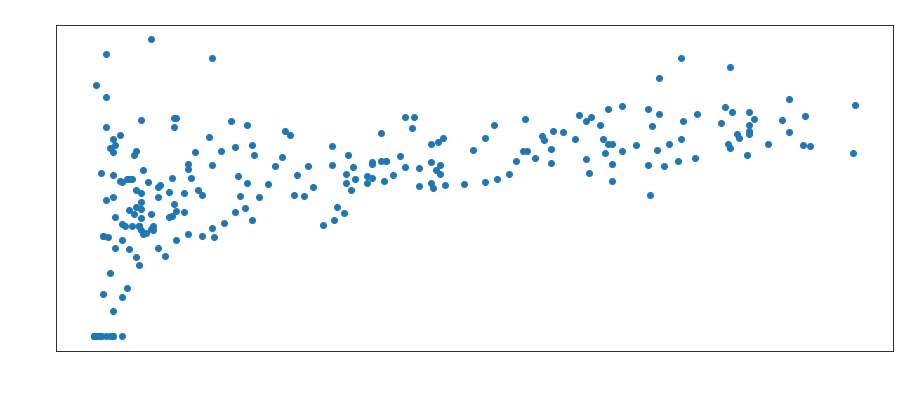

In [132]:
plt.figure(figsize=(15,6))
plt.plot("AB", "OPS", data = batter_base, marker = "o", linestyle = "none")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("AB", fontsize = 15, color = "w")
plt.ylabel("OPS", fontsize = 15, color = "w")
plt.title("21년 타수별 OPS", color = "w", fontsize = 15)

In [133]:
# OPS 이상치 탐색을 위한 수치 정의

Q1 = batter_base["OPS"].quantile(0.25)
Q3 = batter_base["OPS"].quantile(0.75)
IQR = Q3 - Q1
# 실제 OPS 이상치 탐색

batter_base.loc[(batter_base["OPS"] < (Q1 - 1.5 * IQR)) | (batter_base["OPS"] > (Q3 + 1.5 * IQR))].sort_values(by = ["AB"], axis = 0, ascending = False)


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
189,2021,69825,19,15,13,0.0,0,0,0,0.0,0,0,3,0,0,0,김창평,21,0.0,0.0
84,2021,63895,8,9,9,0.0,0,0,0,0.0,0,0,2,0,0,0,최민재,27,0.0,0.0
56,2021,62353,26,10,9,0.0,0,0,0,0.0,1,0,1,0,0,1,박정음,32,0.0,0.0
139,2021,66113,6,8,8,0.0,0,0,0,0.0,0,0,3,0,0,0,김호은,29,0.0,0.0
28,2021,51560,2,7,6,0.0,0,0,0,0.0,0,0,4,0,0,0,이주찬,22,0.0,0.0
33,2021,51868,1,4,4,0.0,0,0,0,0.0,0,0,3,0,0,0,고명준,19,0.0,0.0
125,2021,65462,2,4,4,0.0,0,0,0,0.0,0,0,2,0,0,0,김기환,25,0.0,0.0
79,2021,63559,5,3,3,0.0,0,0,0,0.0,0,0,2,0,0,0,백동훈,30,0.0,0.0
5,2021,50208,2,3,3,0.0,0,0,0,0.0,0,0,1,0,0,0,오명진,19,0.0,0.0
34,2021,51907,3,3,3,0.0,0,0,0,0.0,0,0,1,0,0,0,김주원,18,0.0,0.0


In [134]:
batter_base

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
0,2021,50054,25,28,25,0.200,5,0,5,0.200,0,1,5,0,2,0,천성호,23,0.285714,0.485714
1,2021,50150,7,12,10,0.100,1,0,1,0.100,0,1,2,0,1,0,손호영,26,0.250000,0.350000
2,2021,50165,51,205,185,0.243,45,8,78,0.422,0,18,43,0,2,2,라모스,26,0.317073,0.739073
3,2021,50167,14,19,16,0.125,2,0,2,0.125,0,1,7,0,1,0,이주형,20,0.222222,0.347222
4,2021,50202,33,24,20,0.100,2,0,2,0.100,0,2,2,0,0,0,안권수,28,0.181818,0.281818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0,국해성,31,0.125000,0.250000
242,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5,박동원,31,0.372093,0.906093
243,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7,김상수,31,0.307407,0.564407
244,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5,이지영,35,0.313433,0.619433


# 배럴 타구 정의

In [135]:
# Barrel_Hit 함수 정의

# Barrel_Hit(df, 타구속도, 타구각도1, 타구각도2)

def Barrel_Hit(df, HIT_VEL, HIT_ANG_VER1, HIT_ANG_VER2):
    df_copy = df.copy()
    df_copy = df_copy[
                                    (df_copy["HIT_VEL"] >= HIT_VEL) & \
                                    (df_copy["HIT_ANG_VER"] >= HIT_ANG_VER1) & \
                                    (df_copy["HIT_ANG_VER"] <= HIT_ANG_VER2).reset_index(drop = True)]
                                    
    # 장타율 계산

    # 분모 : 타수 => 행 길이
    #print("장타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4
    
    temp = pd.Series(data = [0,0,0,0], index = ["1루타", "2루타", "3루타", "홈런"])
    
    for i in df_copy["HIT_RESULT"].value_counts().keys():
        temp[i] = df_copy["HIT_RESULT"].value_counts()[i]

    numerator = (temp["1루타"] * 1) + (temp["2루타"] * 2) + \
                (temp["3루타"] * 3) + (temp["홈런"] * 4)

    #print("분자 : {}".format(numerator))

    # 장타율
    OBP = numerator / denominator
    #print("장타율 : " , OBP)

    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #print("-" * 50)
    # 타율 계산


    # 분모 : 티수 => 행 길이
    #print("타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
    numerator = (temp["1루타"] + temp["2루타"] + \
                temp["3루타"] + temp["홈런"])

    #print("분자 : {}".format(numerator))

    # 타율

    avg = numerator / denominator
    #print("타율" , avg)
    
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    Barrel = (OBP / 1.5) * (avg / 0.5)
    
    #print(Barrel)
    
    dictionary = {"장타율" : OBP,
                  "타율" : avg,
                  "Barrel" : Barrel}
    return dictionary
    
    #print(dictionary)

# 동명이인 처리

In [143]:
#동명이인 처리

score["선수명"].value_counts() # 오윤석 한놈, 김민수 롯데하나 삼성하나 , 서건창 한놈, 이재원 LG하나 SSG 하나

오윤석    2
김민수    2
서건창    2
이재원    2
안치홍    1
      ..
크레익    1
황대인    1
이흥련    1
최용제    1
허도환    1
Name: 선수명, Length: 194, dtype: int64

In [145]:
batter_base["PCODE"].value_counts().sort_values(ascending= False)

76290    1
71837    1
74339    1
66052    1
79365    1
        ..
50165    1
50167    1
64504    1
73209    1
64166    1
Name: PCODE, Length: 246, dtype: int64

In [167]:
#KBReport 선수기록
score_name = list(score["선수명"])
score_R = list(score["득점"])
score_RBI = list(score["타점"])

score_name_R = dict(list(zip(score_name, score_R)))
score_name_RBI = dict(list(zip(score_name, score_RBI)))


HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
HTS_grouped_PCODE = HTS_grouped_PCODE.reset_index()

HTS_grouped_PCODE["R"] = pd.Series()
HTS_grouped_PCODE["RBI"] = pd.Series()
HTS_grouped_PCODE["NAME"] = pd.Series()

HTS_grouped_PCODE["NAME"] = HTS_grouped_PCODE["PCODE"].map(players_name_number)
HTS_grouped_PCODE["R"] = HTS_grouped_PCODE["NAME"].map(score_name_R).apply(lambda x : 0 if pd.isnull(x) else x)
HTS_grouped_PCODE["RBI"] = HTS_grouped_PCODE["NAME"].map(score_name_RBI).apply(lambda x : 0 if pd.isnull(x) else x)

HTS_grouped_PCODE = HTS_grouped_PCODE[(HTS_grouped_PCODE["R"] != 0) | HTS_grouped_PCODE["RBI"] != 0].reset_index(drop = True)

print(HTS_grouped_PCODE)

     PCODE  HIT_VEL  HIT_ANG_VER     R   RBI NAME
0    50165  145.060        22.10  14.0  25.0  라모스
1    50202  124.185        21.20   8.0   1.0  안권수
2    50357  144.575         8.85   4.0   3.0  박주홍
3    50458  124.220         9.80  36.0  19.0  김지찬
4    50506  136.100        15.80  55.0  37.0  마차도
..     ...      ...          ...   ...   ...  ...
183  79240  137.270         8.60  46.0  37.0  허경민
184  79365  143.105        17.00  46.0  60.0  박동원
185  79402  135.920        12.00  30.0  23.0  김상수
186  79456  129.290         9.10  20.0  25.0  이지영
187  79608  141.385        10.30  32.0  53.0  안치홍

[188 rows x 6 columns]


<ipython-input-167-f9d765c6c55c>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
<ipython-input-167-f9d765c6c55c>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["R"] = pd.Series()
<ipython-input-167-f9d765c6c55c>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["RBI"] = pd.Series()
<ipython-input-167-f9d765c6c55c>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["NAME"] = pd.Series()


In [168]:
HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "오윤석") | (HTS_grouped_PCODE["NAME"] == "김민수") |\
                  (HTS_grouped_PCODE["NAME"] == "서건창") | (HTS_grouped_PCODE["NAME"] == "이재원")]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME
75,64504,138.865,16.00,9.0,5.0,오윤석
81,64793,137.640,15.30,16.0,18.0,김민수
112,67504,145.200,9.50,16.0,18.0,김민수
117,68106,130.080,37.45,11.0,6.0,이재원
160,76812,135.550,18.30,11.0,6.0,이재원
168,78168,137.480,12.80,10.0,7.0,서건창


In [169]:
# 오윤석, 김민수, 서건창, 이재원

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

HTS_grouped_PCODE.loc[75, "R"] = 16
HTS_grouped_PCODE.loc[75, "RBI"] = 8

# HTS_grouped_PCODE.loc[22, "R"] = 36
# HTS_grouped_PCODE.loc[22, "RBI"] = 35

# HTS_grouped_PCODE.loc[62, "R"] = 5
# HTS_grouped_PCODE.loc[62, "RBI"] = 8

HTS_grouped_PCODE.loc[168, "R"] = 55
HTS_grouped_PCODE.loc[168, "RBI"] = 35

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

print(HTS_grouped_PCODE["PCODE"].value_counts())


64469    1
50854    1
79150    1
64153    1
64468    1
        ..
62332    1
65362    1
65515    1
76313    1
76267    1
Name: PCODE, Length: 188, dtype: int64


In [170]:
# final_batter_base는 batter_base에 타점,득점, 타구속도, 발사각도 추가 



final_batter_base = batter_base.copy()
final_batter_base = final_batter_base[final_batter_base["AB"] > 30]
final_batter_base["R"] = pd.Series()
final_batter_base["RBI"] = pd.Series()
final_batter_base["HIT_VEL"] = pd.Series()
final_batter_base["HIT_ANG_VER"] = pd.Series()

final_batter_base



<ipython-input-170-78fc6683b67f>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["R"] = pd.Series()
<ipython-input-170-78fc6683b67f>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["RBI"] = pd.Series()
<ipython-input-170-78fc6683b67f>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL"] = pd.Series()
<ipython-input-170-78fc6683b67f>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG_VER"] = pd.Series()


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,HP,GD,NAME,AGE_VA,OBP,OPS,R,RBI,HIT_VEL,HIT_ANG_VER
2,2021,50165,51,205,185,0.243,45,8,78,0.422,...,2,2,라모스,26,0.317073,0.739073,NaN,NaN,NaN,NaN
8,2021,50357,22,56,47,0.106,5,0,7,0.149,...,0,1,박주홍,20,0.250000,0.399000,NaN,NaN,NaN,NaN
10,2021,50458,68,196,172,0.267,46,1,54,0.314,...,0,0,김지찬,20,0.313830,0.627830,NaN,NaN,NaN,NaN
11,2021,50506,68,274,231,0.277,64,4,90,0.390,...,1,5,마차도,29,0.372263,0.762263,NaN,NaN,NaN,NaN
13,2021,50704,31,115,103,0.155,16,1,24,0.233,...,1,1,임종찬,19,0.230088,0.463088,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021,79240,69,301,279,0.323,90,4,122,0.437,...,3,12,허경민,30,0.368771,0.805771,NaN,NaN,NaN,NaN
242,2021,79365,73,261,219,0.265,58,16,117,0.534,...,6,5,박동원,31,0.372093,0.906093,NaN,NaN,NaN,NaN
243,2021,79402,70,278,237,0.211,50,1,61,0.257,...,3,7,김상수,31,0.307407,0.564407,NaN,NaN,NaN,NaN
244,2021,79456,62,135,124,0.274,34,0,38,0.306,...,1,5,이지영,35,0.313433,0.619433,NaN,NaN,NaN,NaN


In [171]:
HTS_grouped_PCODE_PCODE = list(HTS_grouped_PCODE["PCODE"])
HTS_grouped_PCODE_NAME = list(HTS_grouped_PCODE["NAME"])
HTS_grouped_PCODE_HIT_VEL = list(HTS_grouped_PCODE["HIT_VEL"])
HTS_grouped_PCODE_HIT_ANG_VER = list(HTS_grouped_PCODE["HIT_ANG_VER"])
HTS_grouped_PCODE_R = list(HTS_grouped_PCODE["R"])
HTS_grouped_PCODE_RBI = list(HTS_grouped_PCODE["RBI"])

In [172]:
HTS_PCODE_HIT_VEL = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_VEL)))
HTS_PCODE_HIT_ANG_VER = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_ANG_VER)))
HTS_PCODE_R = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_R)))
HTS_PCODE_RBI = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_RBI)))

In [173]:
final_batter_base["R"] = final_batter_base["PCODE"].map(HTS_PCODE_R).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["RBI"] = final_batter_base["PCODE"].map(HTS_PCODE_RBI).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_VEL"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_VEL).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_ANG_VER"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_ANG_VER).apply(lambda x : 0 if pd.isnull(x) else x)

final_batter_base = HTS_grouped_PCODE.merge(final_batter_base)

In [174]:
final_batter_base

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS
0,50165,145.060,22.10,14.0,25.0,라모스,2021,51,205,185,...,0.422,0,18,43,0,2,2,26,0.317073,0.739073
1,50357,144.575,8.85,4.0,3.0,박주홍,2021,22,56,47,...,0.149,0,9,21,0,0,1,20,0.250000,0.399000
2,50458,124.220,9.80,36.0,19.0,김지찬,2021,68,196,172,...,0.314,3,13,21,0,0,0,20,0.313830,0.627830
3,50506,136.100,15.80,55.0,37.0,마차도,2021,68,274,231,...,0.390,5,37,34,1,1,5,29,0.372263,0.762263
4,50704,143.205,13.65,6.0,8.0,임종찬,2021,31,115,103,...,0.233,0,9,41,0,1,1,19,0.230088,0.463088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,79240,137.270,8.60,46.0,37.0,허경민,2021,69,301,279,...,0.437,1,18,19,1,3,12,30,0.368771,0.805771
159,79365,143.105,17.00,46.0,60.0,박동원,2021,73,261,219,...,0.534,1,32,69,0,6,5,31,0.372093,0.906093
160,79402,135.920,12.00,30.0,23.0,김상수,2021,70,278,237,...,0.257,0,30,26,0,3,7,31,0.307407,0.564407
161,79456,129.290,9.10,20.0,25.0,이지영,2021,62,135,124,...,0.306,2,7,11,1,1,5,35,0.313433,0.619433


In [191]:
final_batter_base[["BA", "SLG","R","RBI"]].corr()

,BA,SLG,R,RBI
BA,1.000000,0.764089,0.617845,0.596835
SLG,0.764089,1.000000,0.594464,0.702580
R,0.617845,0.594464,1.000000,0.850424
RBI,0.596835,0.702580,0.850424,1.000000


In [175]:
final_batter_base[(final_batter_base["OBP"] == 0) | (final_batter_base["OPS"] == 0)]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [176]:
final_batter_base[final_batter_base["AB"] < 30]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [177]:
final_batter_base.to_csv("./final21.csv", index =False)

In [178]:
Barrel_Hit(HTS, 145, 15,28)

{'장타율': 1.6277695716395864,
 '타율': 0.5930576070901034,
 'Barrel': 1.2871481694008742}

In [183]:
#HTS_123H = HTS[(HTS["HIT_RESULT"] == "1루타") | (HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]
#HTS_23H = HTS[(HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]




final_batter_base["HIT_ANG25"] = pd.Series()
final_batter_base["HIT_ANG75"] = pd.Series()
final_batter_base["HIT_ANG50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_ANG25 = []
HIT_ANG75 = []
HIT_ANG50 = []

for i in final_batter_base_name :
    HIT_ANG25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_ANG_VER"])
    HIT_ANG75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_ANG_VER"])
    HIT_ANG50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_ANG_VER"])

    
NAME_HIT_ANG25 = dict(list(zip(final_batter_base_name, HIT_ANG25)))
NAME_HIT_ANG75 = dict(list(zip(final_batter_base_name, HIT_ANG75)))
NAME_HIT_ANG50 = dict(list(zip(final_batter_base_name, HIT_ANG50)))

final_batter_base["HIT_ANG25"] = final_batter_base["NAME"].map(NAME_HIT_ANG25)
final_batter_base["HIT_ANG75"] = final_batter_base["NAME"].map(NAME_HIT_ANG75)
final_batter_base["HIT_ANG50"] = final_batter_base["NAME"].map(NAME_HIT_ANG50)

final_batter_base["Barrel"] = pd.Series()

for i in range(final_batter_base.shape[0]):
    final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]

<ipython-input-183-6267ac9dbfb8>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG25"] = pd.Series()
<ipython-input-183-6267ac9dbfb8>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG75"] = pd.Series()
<ipython-input-183-6267ac9dbfb8>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG50"] = pd.Series()
<ipython-input-183-6267ac9dbfb8>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["Barrel"] = pd.Series()
<ipyth

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-183-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [181]:
final_batter_base["HIT_VEL25"] = pd.Series()
final_batter_base["HIT_VEL75"] = pd.Series()
final_batter_base["HIT_VEL50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_VEL25 = []
HIT_VEL75 = []
HIT_VEL50 = []

for i in final_batter_base_name :
    HIT_VEL25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_VEL"])
    HIT_VEL75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_VEL"])
    HIT_VEL50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_VEL"])

    
NAME_HIT_VEL25 = dict(list(zip(final_batter_base_name, HIT_VEL25)))
NAME_HIT_VEL75 = dict(list(zip(final_batter_base_name, HIT_VEL75)))
NAME_HIT_VEL50 = dict(list(zip(final_batter_base_name, HIT_VEL50)))

final_batter_base["HIT_VEL25"] = final_batter_base["NAME"].map(NAME_HIT_VEL25)
final_batter_base["HIT_VEL75"] = final_batter_base["NAME"].map(NAME_HIT_VEL75)
final_batter_base["HIT_VEL50"] = final_batter_base["NAME"].map(NAME_HIT_VEL50)

<ipython-input-181-aa522e9287dc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL25"] = pd.Series()
<ipython-input-181-aa522e9287dc>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL75"] = pd.Series()
<ipython-input-181-aa522e9287dc>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL50"] = pd.Series()


In [184]:
final_batter_base.corr()[["OBP","SLG","OPS"]]

,OBP,SLG,OPS
PCODE,0.124087,0.125809,0.136873
HIT_VEL,0.159954,0.448009,0.373319
HIT_ANG_VER,-0.085105,0.234667,0.127199
R,0.597881,0.594464,0.651419
RBI,0.540478,0.702580,0.702660
GYEAR,NaN,NaN,NaN
GAMENUM,0.549064,0.471443,0.546927
PA,0.551336,0.538337,0.593923
AB,0.516565,0.535898,0.578172
BA,0.808854,0.764089,0.853634


In [180]:
final_batter_base.corr()[["SLG", "OBP","OPS"]].loc["Barrel"]

SLG    0.549742
OBP    0.212290
OPS    0.464573
Name: Barrel, dtype: float64

In [185]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    139.99
50%    148.43
75%    154.57
Name: HIT_VEL, dtype: float64

In [186]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    10.40
50%    16.65
75%    22.20
Name: HIT_ANG_VER, dtype: float64

In [187]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    138.815
50%    146.400
75%    153.300
Name: HIT_VEL, dtype: float64

In [188]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    13.350
50%    18.650
75%    24.875
Name: HIT_ANG_VER, dtype: float64

In [189]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    149.76
50%    154.77
75%    159.11
Name: HIT_VEL, dtype: float64

In [190]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    24.7
50%    28.1
75%    32.3
Name: HIT_ANG_VER, dtype: float64